In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

import neuro_morpho_toolbox as nmt
pickle_in = open("/home/penglab/FeaCal/AP_hdbscan_ns.pickle","rb")
example_ = pickle.load(pickle_in)
ns_xie = example_[0]

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.81
Loading CCF brain structure data...
Loading time: 0.00


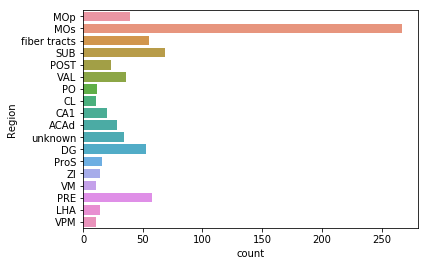

In [2]:
sf = ns_xie.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )


## function detailSUB(ns,dicF,interestedL) will return a dataframe 
* first a DataFrame will be generated, 



In [30]:
import ast
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib as mpl
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def normalize(df, log=True):
    scaled_data = np.array(df) / np.sum(df, axis=0).values.reshape(-1,1) * 100000
    if log:
        scaled_data = np.log(scaled_data+100)
    scaled_dataDF = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
    return scaled_dataDF

def detailSUB(ns,interestedL):
    somaDF = ns.features['soma_features'].region
    axonDF = ns.features['projection_features'].raw_data
    normaF=0

    somaregionDF = somaDF.copy()
    axonregionDF = axonDF.copy()      

    colname = ['Cluster Num','soma Region List','axon Region List']

    typeR, typeC = np.unique(ns.metadata['Cluster'] , return_counts = True)
    detailDF = pd.DataFrame(index = typeR,columns = ['swc list','soma region','max soma','total soma',
                                                             'max axon'])

        # for each cluster result UNDER EACH PARAMETER
    somaCLUSTERlist = []
    axonCLUSTERlist = []

    #axonCLUSTER = pd.DataFrame(index = axonregionDF.columns[:-1])
    for label_idx in detailDF.index:
        #print( label_idx)
        axonTEMPdf = pd.DataFrame(index = axonregionDF.columns)
        swcINlabel = ns.metadata[ns.metadata['Cluster']==label_idx]
        detailDF.loc[label_idx,'swc list'] = (swcINlabel.index).tolist()
        #assert(len(inter_list)==somaDF[somaDF['cluster'] !=label_idx].shape[0])
        detailDF.loc[label_idx,'soma region'] = swcINlabel['SomaRegion'].tolist()
        del_soma_region = detailDF.loc[label_idx,'soma region']
        while 'unknown' in del_soma_region:
            del_soma_region.remove('unknown')
            del_soma_region.append('others')
        while 'fiber tracts' in del_soma_region:
            del_soma_region.remove('fiber tracts')
            del_soma_region.append('others')
        IDrange, IDcounts = np.unique(del_soma_region, return_counts = True)
        #sort the counting
        count_sort_ind = np.argsort(-IDcounts)
        dicitem = []
        for i in range(1,min(len(IDrange)+1,4)):
            dicitem.append(str(i)+'somaR')
        for i in range(1,min(len(IDrange)+1,4)):
            dicitem.append(str(i)+'somaC')
        #select the first three regions
        dicvalue = IDrange[count_sort_ind][0:min(3,len(IDrange))]
        dicvalue = np.append(dicvalue,IDcounts[count_sort_ind][0:min(3,len(IDrange))])
        detailDF.loc[label_idx,'max soma'] = str(dict(zip(dicitem, dicvalue)))
        detailDF.loc[label_idx,'total soma'] = swcINlabel.shape[0]
        #axonLABEL stores all the rows under same cluster
        axonregionDF.loc[:,'cluster'] = ns.metadata['Cluster'].copy()
        axonLABEL = axonregionDF[axonregionDF['cluster']==label_idx].copy()
        axonLABEL.drop('cluster', axis=1,inplace=True)
        axonTEMPdf[label_idx]=axonLABEL.sum()
        if 'contra_fiber tracts' in axonTEMPdf.index:
            axonTEMPdf.drop(index=['contra_fiber tracts'],inplace = True)
        if 'ipsi_fiber tracts' in axonTEMPdf.index:
            axonTEMPdf.drop(index=['ipsi_fiber tracts'],inplace = True)
        if normaF:
            #normalize the sum
            axonTEMPdf = normalize(axonTEMPdf , log=True)
        interestDF = axonTEMPdf.loc[interestList,:].copy()
        
        nonzeroIDX = interestDF[interestDF.loc[:,label_idx]>0].index
        interestDF = interestDF[interestDF.loc[:,label_idx]>0].copy()
        remainDF = axonTEMPdf.loc[list(set(axonTEMPdf.index.tolist()).difference(set(nonzeroIDX))),:]
        interestDF.loc['other',label_idx] = remainDF.sum(axis = 0, skipna = True)[0] 
        interestDF.sort_values(by=label_idx, ascending=False, inplace=True)
                
        dicitem = interestDF.index.tolist()
        dicvalue = interestDF.loc[:,label_idx]
        detailDF.loc[label_idx,'max axon'] = str(dict(zip(dicitem, dicvalue)))
        return detailDF.copy()

In [39]:
single_interest = ['MM','AV','ENTm','RE','AM','ENTl','PL','BLA','ILA','COAp','COAa','TR',
                   'RSPv','OT','LSc','LSv','LSr','BST']
interList = []
for ii in single_interest:
    interList.append('ipsi_'+str(ii))
    interList.append('contra_'+str(ii))

In [40]:
detailSUB(ns_xie,interList)

ValueError: cannot reindex from a duplicate axis

In [17]:
    ns = ns_xie


C1
C10
C11
C12
C13
C14
C15
C16
C17
C18
C19
C2
C20
C21
C22
C23
C24
C25
C26
C27
C28
C29
C3
C30
C31
C4
C5
C6
C7
C8
C9


In [26]:
detailDF.to_csv('/home/penglab/Documents/modifiy18Sep.csv')

In [ ]:
dicXie.to_csv('/home/penglab/Documents/AP_hdbscan_detail.csv')

In [ ]:
len(dicXie.loc['C3','swc list'])

In [ ]:
len(dicXie.loc['C14','swc list'])

In [ ]:
len(dicXie.loc['C15','swc list'])

In [6]:
dicXie 

,swc list,soma region,max soma,total soma,max axon
C1,"[AA0017, AA0056, AA0077, AA0080, AA0081, AA008...","[BST, PF, PVi, DMH, DMH, VMH, SBPV, AHN, ZI, V...","{'1somaR': 'others', '2somaR': 'LHA', '3somaR'...",161,"{'1axonR': 'ipsi_PAG', '2axonR': 'ipsi_MRN', '..."
C10,[AA0121],[ORBl],"{'1somaR': 'ORBl', '1somaC': '1'}",1,"{'1axonR': 'ipsi_CP', '2axonR': 'ipsi_MRN', '3..."
C11,"[AA0027, AA0028, AA0067, AA0069, AA0085, AA012...","[VISp, VISp, ACAd, IAD, VISp, VISp, VISp, DG, ...","{'1somaR': 'others', '2somaR': 'VISp', '3somaR...",43,"{'1axonR': 'ipsi_VISp', '2axonR': 'ipsi_VISl',..."
C12,[AA0336],[LD],"{'1somaR': 'LD', '1somaC': '1'}",1,"{'1axonR': 'ipsi_ACAd', '2axonR': 'ipsi_POST',..."
C13,"[AA0091, AA0143, AA0144, AA0145, AA0146, AA014...","[DG, DG, DG, DG, DG, DG, DG, DG, DG, DG, DG, D...","{'1somaR': 'DG', '2somaR': 'CA3', '3somaR': 'o...",25,"{'1axonR': 'ipsi_CA3', '2axonR': 'ipsi_DG', '3..."
C14,"[AA0052, AA0195, AA0248, AA0257, AA0620, AA068...","[SUB, SUB, ProS, ProS, ProS, ProS, ProS, SUB, ...","{'1somaR': 'ProS', '2somaR': 'SUB', '1somaC': ...",9,"{'1axonR': 'ipsi_ACB', '2axonR': 'ipsi_MM', '3..."
C15,"[AA0173, AA0251, AA0381, AA0384, AA0500, AA057...","[PRE, SUB, POST, DG, SUB, POST, DG, PRE, PRE, ...","{'1somaR': 'POST', '2somaR': 'PRE', '3somaR': ...",18,"{'1axonR': 'ipsi_ENTm', '2axonR': 'ipsi_ENTl',..."
C16,"[AA0015, AA0016, AA0018, AA0019, AA0029, AA006...","[AV, AV, AV, AV, AV, LD, SUB, LD, PO, AV, othe...","{'1somaR': 'AV', '2somaR': 'LD', '3somaR': 'ot...",12,"{'1axonR': 'ipsi_RSPv', '2axonR': 'ipsi_PRE', ..."
C17,"[AA0194, AA0199, AA0496, AA0498, AA0560, AA061...","[SUB, ProS, SUB, SUB, SUB, ProS, ProS, ProS, S...","{'1somaR': 'SUB', '2somaR': 'ProS', '3somaR': ...",15,"{'1axonR': 'ipsi_RSPv', '2axonR': 'ipsi_MM', '..."
C18,[AA0491],[DG],"{'1somaR': 'DG', '1somaC': '1'}",1,"{'1axonR': 'ipsi_SUB', '2axonR': 'ipsi_MM', '3..."


In [ ]:
len(dicXie.loc['C17','swc list'])

In [ ]:
len(dicXie.loc['C19','swc list'])

In [ ]:
len(dicXie.loc['C20','swc list'])

In [ ]:
len(dicXie.loc['C21','swc list'])

In [ ]:
len(dicXie.loc['C22','swc list'])

In [ ]:
len(dicXie.loc['C23','swc list'])

Transfer the id to abbreviation for CCF document, store in **listABBR**

In [ ]:
ccfDF = pd.read_excel('/home/penglab/Documents/dataSource/ccfDF.xlsx', index_col=0)

In [ ]:
def id_to_name(region_id):
    if region_id>0:
    # region_name can be either abbrevation (checked first) or description
        abbr=nmt.bs.level.loc[region_id,'Abbrevation']
    else:
        abbr='non'
    return abbr
     

In [ ]:
listABBR = []
for i in ccfDF.index.tolist():
    listABBR.append(id_to_name(i))
    

* **Brain regions** inside CCF file includes: FRP MOp MOs SSp-n SSp-bfd SSp-ll SSp-m SSp-ul SSp-tr SSp-un SSs GU VISC AUDd AUDp AUDpo AUDv VISal VISam VISl VISp VISpl VISpm VISli VISpor ACAd ACAv PL ILA ORBl ORBm ORBvl AId AIp AIv RSPagl RSPd RSPv VISa VISrl TEa PERI ECT MOB AOB AON TT DP PIR NLOT COAa COAp PAA TR CA1 CA2 CA3 DG FC IG ENTl ENTm PAR POST PRE SUB ProS HATA APr CLA EPd EPv LA BLA BMA PA CP ACB FS OT LSc LSr LSv SF SH AAA BA CEA IA MEA GPe GPi SI MA MS NDB TRS BST BAC VAL VM VPL VPLpc VPM VPMpc PoT SPFm SPFp SPA PP MG LGd LP PO POL SGN AV AM AD IAM IAD LD IMD MD SMT PR PVT PT RE Xi RH CM PCN CL PF PIL RT IGL IntG LGv SubG MH LH SO ASO PVH PVa PVi ARH ADP AVP AVPV DMH MEPO MPO OV PD PS PVp PVpo SBPV SCH SFO VMPO VLPO AHN LM MM SUM TMd TMv MPN PMd PMv PVHd VMH PH LHA LPO PST PSTN PeF RCH STN TU ZI ME SCs IC NB SAG PBG MEV SCO SNr VTA PN RR MRN SCm PAG APN MPT NOT NPC OP PPT CUN RN III MA3 EW IV Pa4 VTN AT LT DT MT SNc PPN IF IPN RL CLI DR NLL PSV PB SOC B DTN PDTg PCG PG PRNc SG SUT TRN V P5 Acs5 PC5 I5 CS LC LDT NI PRNr RPO SLC SLD AP DCO VCO CU GR ECU NTB NTS SPVC SPVI SPVO Pa5 VI VII ACVII AMB DMX GRN ICB IO IRN ISN LIN LRN MARN MDRN MDRNd MDRNv PARN PAS PGRNd PGRNl NR PRP PPY LAV MV SPIV SUV x XII y RM RPA RO LING CENT CUL DEC FOTU PYR UVU NOD SIM AN PRM COPY PFL FL FN IP DN VeCB fiber tracts


* Here only focus on ['MM','AV','ENTm','RE','AM','ENTl','PL','BLA','ILA','COAp','COAa','TR','RSPv','OT','LSc','LSv','LSr','BST']

In [ ]:
for i in single_interest:
    if i not in listABBR:
        print(i)

In [41]:
    ns= ns_xie
    somaDF = ns.features['soma_features'].region
    axonDF = ns.features['projection_features'].raw_data
    normaF=0

    somaregionDF = somaDF.copy()
    axonregionDF = axonDF.copy()      

    colname = ['Cluster Num','soma Region List','axon Region List']

    typeR, typeC = np.unique(ns.metadata['Cluster'] , return_counts = True)
    detailDF = pd.DataFrame(index = typeR,columns = ['swc list','soma region','max soma','total soma',
                                                             'max axon'])

        # for each cluster result UNDER EACH PARAMETER
    somaCLUSTERlist = []
    axonCLUSTERlist = []

    #axonCLUSTER = pd.DataFrame(index = axonregionDF.columns[:-1])
    for label_idx in detailDF.index:
        axonTEMPdf = pd.DataFrame(index = axonregionDF.columns)
        swcINlabel = ns.metadata[ns.metadata['Cluster']==label_idx]
        detailDF.loc[label_idx,'swc list'] = (swcINlabel.index).tolist()
        #assert(len(inter_list)==somaDF[somaDF['cluster'] !=label_idx].shape[0])
        detailDF.loc[label_idx,'soma region'] = swcINlabel['SomaRegion'].tolist()
        del_soma_region = detailDF.loc[label_idx,'soma region']
        while 'unknown' in del_soma_region:
            del_soma_region.remove('unknown')
            del_soma_region.append('others')
        while 'fiber tracts' in del_soma_region:
            del_soma_region.remove('fiber tracts')
            del_soma_region.append('others')
        IDrange, IDcounts = np.unique(del_soma_region, return_counts = True)
        #sort the counting
        count_sort_ind = np.argsort(-IDcounts)
        dicitem = []
        for i in range(1,min(len(IDrange)+1,4)):
            dicitem.append(str(i)+'somaR')
        for i in range(1,min(len(IDrange)+1,4)):
            dicitem.append(str(i)+'somaC')
        #select the first three regions
        dicvalue = IDrange[count_sort_ind][0:min(3,len(IDrange))]
        dicvalue = np.append(dicvalue,IDcounts[count_sort_ind][0:min(3,len(IDrange))])
        detailDF.loc[label_idx,'max soma'] = str(dict(zip(dicitem, dicvalue)))
        detailDF.loc[label_idx,'total soma'] = swcINlabel.shape[0]

        #axonLABEL stores all the rows under same cluster
        axonregionDF.loc[:,'cluster'] = ns.metadata['Cluster'].copy()
        axonLABEL = axonregionDF[axonregionDF['cluster']==label_idx].copy()
        axonLABEL.drop('cluster', axis=1,inplace=True)
        axonTEMPdf[label_idx]=axonLABEL.sum()
        if 'contra_fiber tracts' in axonTEMPdf.index:
            axonTEMPdf.drop(index=['contra_fiber tracts'],inplace = True)
        if 'ipsi_fiber tracts' in axonTEMPdf.index:
            axonTEMPdf.drop(index=['ipsi_fiber tracts'],inplace = True)
        if normaF:
            #normalize the sum
            axonTEMPdf = normalize(axonTEMPdf , log=True)
        interestDF = axonTEMPdf.loc[interestList,:].copy()
        
        nonzeroIDX = interestDF[interestDF.loc[:,label_idx]>0].index
        interestDF = interestDF[interestDF.loc[:,label_idx]>0].copy()
        remainDF = axonTEMPdf.loc[list(set(axonTEMPdf.index.tolist()).difference(set(nonzeroIDX))),:]
        interestDF.loc['other',label_idx] = remainDF.sum(axis = 0, skipna = True)[0] 
        interestDF.sort_values(by=label_idx, ascending=False, inplace=True)
                
        dicitem = interestDF.index
        dicvalue = interestDF.loc[:,label_idx]
        detailDF.loc[label_idx,'max axon'] = str(dict(zip(dicitem, dicvalue)))
        


ValueError: cannot reindex from a duplicate axis

In [ ]:
detailDF

In [ ]:

        axonCLUSTERlist.append(detailDF.loc[label_idx,'max axon'] )
    #(detailDF).to_csv('/home/penglab/Documents/detailXie.csv')
    clusterDF = detailDF.copy()
    dfname=[]
    for cluster_idx in clusterDF.index:
        dfname.append((str(cluster_idx) + 'DF'))

    #generate a dataframe for each cluster
    dicDF = {k:None for k in dfname}

    #iterate the correponding dataframe and cluster at the same time
    for key_iter,cluster_idx in zip(dicDF.keys(),clusterDF.index):
        dic_soma = ast.literal_eval(clusterDF.loc[cluster_idx,'max soma'])
        iterL = int(len(dic_soma.keys())/2)
        somaNAME = []
        somaCOUNT = []

        for i in range(1,int(iterL)+1):
            somaNAME.append(dic_soma[(str(i)+'somaR')])
        for i in range(1,iterL+1):
            somaCOUNT.append(dic_soma[str(i)+'somaC'])
        somaArr = np.array(somaCOUNT, dtype = float)
        somaArr = somaArr/sum(somaArr)
        dic_axon = ast.literal_eval(clusterDF.loc[cluster_idx,'max axon'])
        iterL = int(len(dic_axon.keys())/2)
        axonNAME = []
        axonCOUNT = []
        for i in range(1,iterL+1):
            axonNAME.append(dic_axon[(str(i)+'axonR')])
        for i in range(1,iterL+1):
            axonCOUNT.append(dic_axon[str(i)+'axonC']) 

        tempDF = pd.DataFrame()
        for row_soma in somaNAME:
            for col_axon,len_axon in zip(axonNAME,axonCOUNT):
                tempDF.loc[row_soma, col_axon] = len_axon

        assert(tempDF.shape[0] == len(somaArr))  
        tempDF=tempDF.astype(float)
        for i in range(tempDF.shape[0]):
            tempDF.iloc[i,:] = tempDF.iloc[i,:]*somaArr[i].copy()

        newDF = pd.DataFrame(columns=['from','to','value'],index=range(tempDF.shape[0]*tempDF.shape[1]))
        newDF.loc[:,'from'] = (tempDF.index).tolist()*len(tempDF.columns)
        newDF.loc[:,'to'] = [ele for ele in (tempDF.columns).tolist() for _ in range(len(tempDF.index))]
        valuelist=[]
        for iter_col in tempDF.columns:
            for iter_row in tempDF.index:
                valuelist.append(tempDF.loc[iter_row,iter_col])
        newDF.loc[:,'value']=valuelist
        dicDF[key_iter]= newDF.copy()        

In [ ]:
interestDF.plot.bar(x='idx', y=label_idx, rot=0)


In [55]:
bothList

['ipsi_MM',
 'ipsi_AV',
 'ipsi_ENTm',
 'ipsi_RE',
 'ipsi_AM',
 'ipsi_ENTl',
 'ipsi_PL',
 'ipsi_BLA',
 'ipsi_ILA',
 'ipsi_COAp',
 'ipsi_COAa',
 'ipsi_TR',
 'ipsi_RSPv',
 'ipsi_OT',
 'ipsi_LSc',
 'ipsi_LSv',
 'ipsi_LSr',
 'ipsi_BST']

In [ ]:
df

In [ ]:
summ = 0.0
for i in (remain.loc[:,label_idx]):
    summ = summ+float(i)
    
    print(summ)

In [ ]:
        
        
        
        dicitem = []
        for i in range(1,5):
            dicitem.append(str(i)+'axonR')
        for i in range(1,5):
            dicitem.append(str(i)+'axonC')

        dicvalue = axonTEMPdf.index[:3]
        dicvalue = np.append(dicvalue, 'other')
        dicvalue = np.append(dicvalue,axonTEMPdf.loc[:,label_idx][:3])
        dicvalue = np.append(dicvalue,sum(axonTEMPdf.loc[:,label_idx][:-1])-sum(axonTEMPdf.loc[:,label_idx][:3]))
        detailDF.loc[label_idx,'max axon'] = str(dict(zip(dicitem, dicvalue)))
        axonCLUSTERlist.append(detailDF.loc[label_idx,'max axon'] )
    #(detailDF).to_csv('/home/penglab/Documents/detailXie.csv')
    clusterDF = detailDF.copy()
    dfname=[]
    for cluster_idx in clusterDF.index:
        dfname.append((str(cluster_idx) + 'DF'))

    #generate a dataframe for each cluster
    dicDF = {k:None for k in dfname}

    #iterate the correponding dataframe and cluster at the same time
    for key_iter,cluster_idx in zip(dicDF.keys(),clusterDF.index):
        dic_soma = ast.literal_eval(clusterDF.loc[cluster_idx,'max soma'])
        iterL = int(len(dic_soma.keys())/2)
        somaNAME = []
        somaCOUNT = []

        for i in range(1,int(iterL)+1):
            somaNAME.append(dic_soma[(str(i)+'somaR')])
        for i in range(1,iterL+1):
            somaCOUNT.append(dic_soma[str(i)+'somaC'])
        somaArr = np.array(somaCOUNT, dtype = float)
        somaArr = somaArr/sum(somaArr)
        dic_axon = ast.literal_eval(clusterDF.loc[cluster_idx,'max axon'])
        iterL = int(len(dic_axon.keys())/2)
        axonNAME = []
        axonCOUNT = []
        for i in range(1,iterL+1):
            axonNAME.append(dic_axon[(str(i)+'axonR')])
        for i in range(1,iterL+1):
            axonCOUNT.append(dic_axon[str(i)+'axonC']) 

        tempDF = pd.DataFrame()
        for row_soma in somaNAME:
            for col_axon,len_axon in zip(axonNAME,axonCOUNT):
                tempDF.loc[row_soma, col_axon] = len_axon

        assert(tempDF.shape[0] == len(somaArr))  
        tempDF=tempDF.astype(float)
        for i in range(tempDF.shape[0]):
            tempDF.iloc[i,:] = tempDF.iloc[i,:]*somaArr[i].copy()

        newDF = pd.DataFrame(columns=['from','to','value'],index=range(tempDF.shape[0]*tempDF.shape[1]))
        newDF.loc[:,'from'] = (tempDF.index).tolist()*len(tempDF.columns)
        newDF.loc[:,'to'] = [ele for ele in (tempDF.columns).tolist() for _ in range(len(tempDF.index))]
        valuelist=[]
        for iter_col in tempDF.columns:
            for iter_row in tempDF.index:
                valuelist.append(tempDF.loc[iter_row,iter_col])
        newDF.loc[:,'value']=valuelist
        dicDF[key_iter]= newDF.copy()

In [ ]:
for iter_key in dicXie.keys():
    tempDF = dicXie[iter_key]
    print(tempDF)
    (tempDF).to_csv('/home/penglab/Documents/UPDATExie/'+str(iter_key)+'.csv')

In [ ]:
dicXie

,C9
ipsi_RR,3345.970806
ipsi_ADP,0.000000
contra_IAD,0.000000
contra_SubG,0.000000
ipsi_DTN,0.000000
contra_TU,0.000000
ipsi_RO,907.128479
contra_PL,0.000000
contra_PRM,0.000000
contra_ProS,0.000000


In [86]:
axonTEMPdf.loc[interestDF[interestDF.loc[:,label_idx]>0].index.tolist(),:]

,C9
ipsi_RE,5367.686368
ipsi_AM,3910.876737
contra_RE,2486.502378
ipsi_PL,1990.590642
ipsi_BST,1296.117925
ipsi_AV,938.213761
contra_AV,119.774718
